# Trying Tensors

In [1]:
import torch

In [3]:
i = torch.ones(5,3)
print(i)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [4]:
x = torch.rand(5,3)
print(x)

tensor([[0.4159, 0.6463, 0.2227],
        [0.3835, 0.4011, 0.2591],
        [0.9060, 0.4945, 0.2419],
        [0.0771, 0.3151, 0.2354],
        [0.7243, 0.8706, 0.1346]])


# Training a simple model

In [6]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim # it is used for optimization of the model
import torch.nn.functional as F # it is used for activation functions

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [7]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # it is used for normalization of the data, it is used to make the data in the range of -1 to 1

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform) # it is used to download the data from the internet
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                            shuffle=True, num_workers=2) # it is used to load the data in the form of batches, num_workers is used to load the data in parallel, batch_size is used to load the data in the form of batches of 4, batches is a group of data

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                            shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


 bird  deer  deer horse


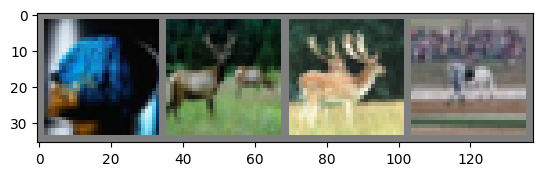

In [10]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# Iterar sobre os dados usando um loop for
for images, labels in trainloader:
    imshow(torchvision.utils.make_grid(images))
    print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
    break

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # 3 is the input channel, 6 is the output channel, 5 is the kernel size
        self.pool = nn.MaxPool2d(2, 2) # 2 is the kernel size, 2 is the stride. pool is used to reduce the size of the image
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120) # 16 is the input channel, 5*5 is the size of the image, 120 is the output channel
        self.fc2 = nn.Linear(120, 84) # 120 is the input channel, 84 is the output channel
        self.fc3 = nn.Linear(84, 10) # 84 is the input channel, 10 is the output channel. 10 is the number of classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # F.relu is the activation function, it is used to remove the negative values
        x = self.pool(F.relu(self.conv2(x))) 
        x = x.view(-1, 16 * 5 * 5) # it is used to flatten the data
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [12]:
criterion = nn.CrossEntropyLoss() # it is used to calculate the loss, it is used to calculate the difference between the predicted value and the actual value
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) # it is used to optimize the model, lr is the learning rate

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.229
[1,  4000] loss: 1.841
[1,  6000] loss: 1.658
[1,  8000] loss: 1.586
[1, 10000] loss: 1.509
[1, 12000] loss: 1.477
[2,  2000] loss: 1.406
[2,  4000] loss: 1.369
[2,  6000] loss: 1.378
[2,  8000] loss: 1.343
[2, 10000] loss: 1.296
[2, 12000] loss: 1.304
Finished Training


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %
